Import Required Packages

In [ ]:
import gdown
import os
from PIL import Image
import matplotlib.pyplot as plt

Install BRAILS

In [ ]:
!pip install git+https://github.com/NHERI-SimCenter/BRAILS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/NHERI-SimCenter/BRAILS to /tmp/pip-req-build-9tfaguqv
  Running command git clone -q https://github.com/NHERI-SimCenter/BRAILS /tmp/pip-req-build-9tfaguqv
     |████████████████████████████████| 125 kB 6.4 MB/s 
     |████████████████████████████████| 509 kB 44.4 MB/s 
  Created wheel for BRAILS: filename=BRAILS-2.0.1.dev463+g726b6cf-py3-none-any.whl size=9156241 sha256=6a9b15618da211e565cfb09304c67dcd29ba088bcaf347c46a07083e9313265a
  Stored in directory: /tmp/pip-ephem-wheel-cache-rwz55rk5/wheels/95/f4/e3/a6a0d6655270cc9295155895448d84860de3e7b8a1f4fa8840
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=7931452f4742579a8d466a5af4e396a9d07b83dfb80092d0953946ecfca0736c
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
  Created wheel for wget: filename=wget-3.2-py3-

In [ ]:
Download Training/Test Set

In [ ]:
# Obtain the dataset using its dowloadable public Google Drive link and unzip it.
# Data used for this exercise is small subset of the Crack Forest Dataset 
# shared here: https://www.kaggle.com/mahendrachouhanml/crackforest
fileURL = 'https://drive.google.com/uc?export=download&id=10-ewzUHtPyiktSwNuK8n9dlQg8wUCBUr'

fileOut = "dataset.zip"
gdown.download(fileURL, fileOut, quiet=False)

Downloading...
From: https://drive.google.com/uc?export=download&id=10-ewzUHtPyiktSwNuK8n9dlQg8wUCBUr
To: /content/dataset.zip
100%|██████████| 8.97M/8.97M [00:00<00:00, 158MB/s]


'dataset.zip'

In [ ]:
!unzip dataset.zip -d dataset
data_path = 'dataset/bldgSeg'

Archive:  dataset.zip
replace dataset/bldgSeg/valid/masks/78_mask.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: dataset/bldgSeg/valid/masks/78_mask.png  
  inflating: dataset/bldgSeg/valid/masks/72_mask.png  
  inflating: dataset/bldgSeg/valid/images/71.png  
  inflating: dataset/bldgSeg/valid/images/85.png  
  inflating: dataset/bldgSeg/valid/images/76.png  
  inflating: dataset/bldgSeg/valid/images/72.png  
  inflating: dataset/bldgSeg/valid/masks/76_mask.png  
  inflating: dataset/bldgSeg/valid/images/74.png  
  inflating: dataset/bldgSeg/valid/masks/81_mask.png  
  inflating: dataset/bldgSeg/valid/masks/75_mask.png  
  inflating: dataset/bldgSeg/valid/masks/71_mask.png  
  inflating: dataset/bldgSeg/valid/masks/74_mask.png  
  inflating: dataset/bldgSeg/valid/masks/83_mask.png  
  inflating: dataset/bldgSeg/valid/masks/80_mask.png  
  inflating: dataset/bldgSeg/valid/images/82.png  
  inflating: dataset/bldgSeg/valid/masks/84_mask.png  
  inflating: dataset/bldgSeg/vali

In [ ]:
from brails.modules import ImageSegmenter
imSegmenter = ImageSegmenter()
imSegmenter.train(trainDataDir=data_path,classes=["facade","roof","window","door"],nepochs=3)

------------------------------------------------------------
Epoch: 1/3
100%|██████████| 8/8 [00:08<00:00,  1.09s/it]
train loss:  0.2818, valid loss:  0.1961, train f1-score:  0.5851, valid f1-score:  0.5882, 

------------------------------------------------------------
Epoch: 2/3
100%|██████████| 8/8 [00:08<00:00,  1.06s/it]
train loss:  0.1505, valid loss:  0.1704, train f1-score:  0.5927, valid f1-score:  0.5834, 

------------------------------------------------------------
Epoch: 3/3
100%|██████████| 8/8 [00:08<00:00,  1.05s/it]
train loss:  0.1145, valid loss:  0.1190, train f1-score:  0.5936, valid f1-score:  0.5837, 

------------------------------------------------------------
Training completed in 5m 14s
Lowest validation loss:  0.1190
Training complete.


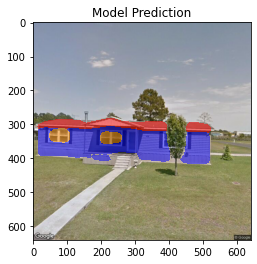

In [ ]:
%matplotlib inline
imno = 6

imPath = data_path + '/valid/images/'
imList = os.listdir(imPath)

imSegmenter.predict(imdir=imPath + imList[imno],classes=["facade","roof","window","door"])